In [24]:
# Get the data.
# MNIST handwritten digits.

# Interesting page on the MNIST data including 3D graphs.
# https://colah.github.io/posts/2014-10-Visualizing-MNIST/

# Nothing worked on Mac until I did this:
# Run "Install Certificates.command" in Applications/Python3.8

# The following python in the book no longer works. Nothing happens.
# https://github.com/ageron/handson-ml/issues/7
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784',version=1)

# The following fix from 2017 no longer works either. 
# cannot import name 'fetch_mldata' from 'sklearn.datasets'
# https://github.com/ageron/handson-ml/issues/301
#from six.moves import urllib
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')

# Geron recommends keras via tensorflow
# but the data is not the same. This data is...
# + not sorted 
# + already transformed from 1x784 to 2x28
# + labeled with uint not float
# + already split into 60K train, 10K test

import ssl
import tensorflow
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Each element is a numpy ndarray
# https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
type(X_train)

numpy.ndarray

In [10]:
# We have 60K training images and 10K test images.
# Each image is 28 pixels square.
X_train.shape

(60000, 28, 28)

In [19]:
# We have 60K training labels and 10K test labels.
# Each label is unsigned int 1-byte.
y_train[5:10]

array([2, 1, 3, 1, 4], dtype=uint8)

In [20]:
# The images are sparse with white background on edges.
X_train[:1,:10]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [23]:
# Interesting page on exploring this data.
# https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84
# He suggests to_categorical() to avoid ordered numbers.
num_pixels = 784
X_train1D = X_train.reshape(X_train.shape[0],num_pixels)
X_test1D = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)

(60000, 784)


In [26]:
# Visualize the first digit
import matplotlib as mpl
import matplotlib.pyplot as plt
sample_0 = X_train[0]
sample_0.shape

(28, 28)

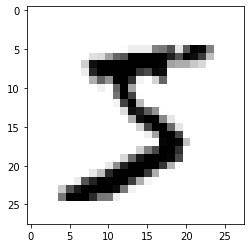

In [27]:
plt.imshow(sample_0,cmap="binary")
plt.show()

In [29]:
# What is the class of the first digit?
y_train[0]

5